In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston= load_boston()

bostonDF= pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']=boston.target

bostonDF.head()

C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


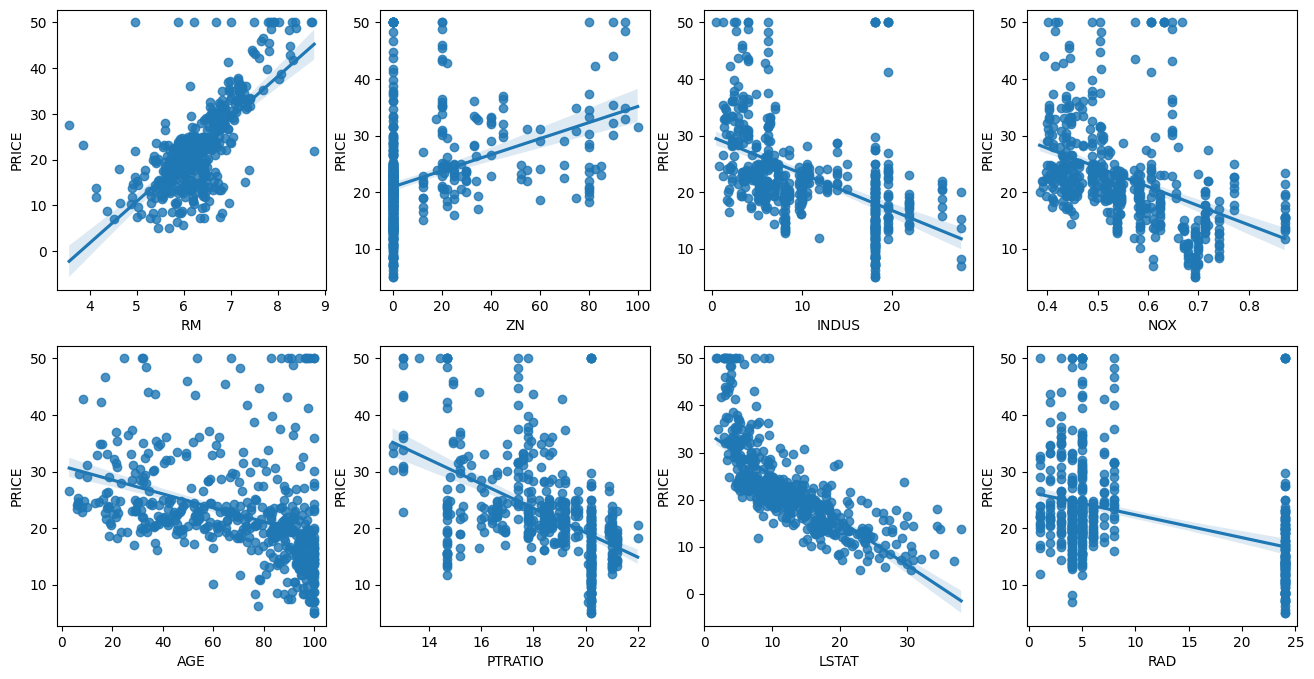

In [8]:
fig, axs=plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.296916, RMSE:4.158956
Variance score: 0.757


In [12]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164506
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 6.934, RMSE : 2.633
Variance score : 0.903


In [22]:
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
df=X_data.corr()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


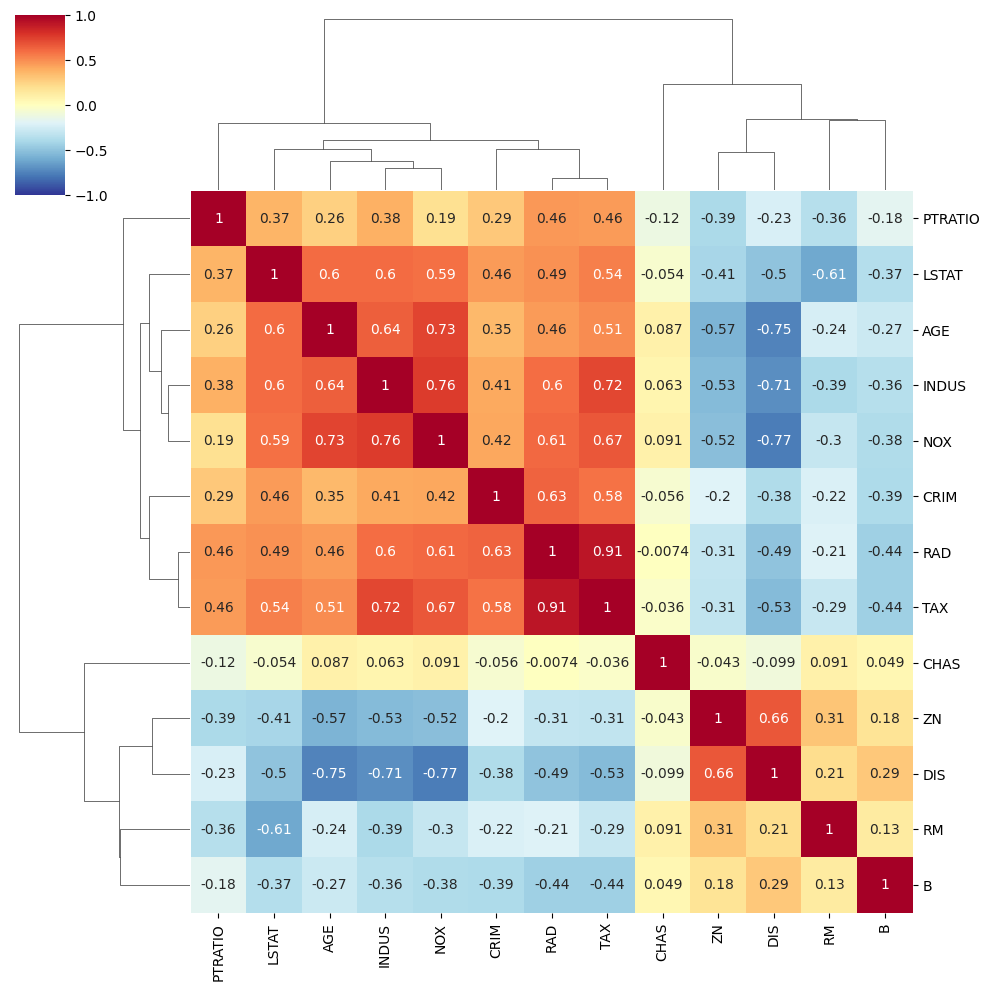

In [23]:
sns.clustermap(df,annot=True,
              cmap='RdYlBu_r',
              vmin=-1,vmax=1,
              )

C:\Users\cmjid\AppData\Local\Temp\ipykernel_6472\3012380837.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(df, dtype=np.bool)


<AxesSubplot:>

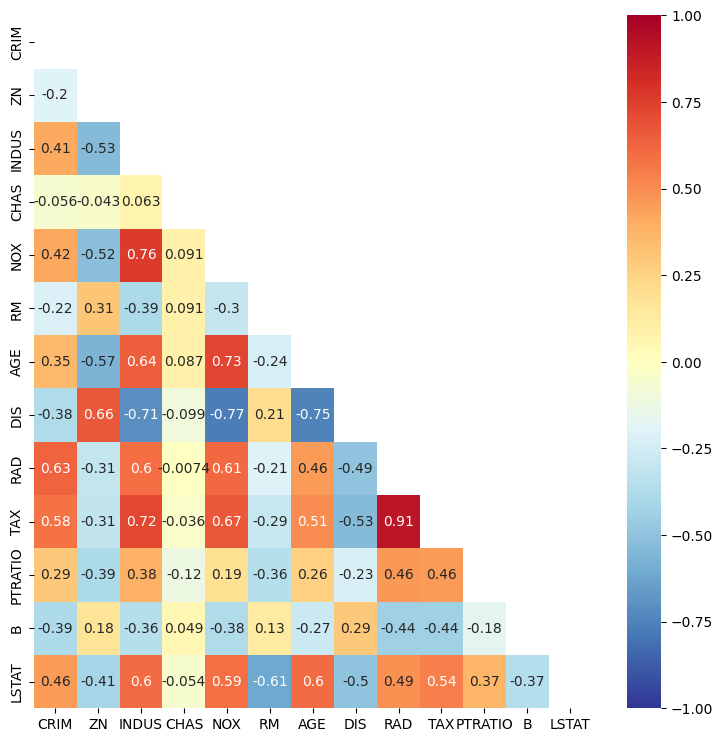

In [30]:
fig,ax=plt.subplots(figsize=(9,9))

mask=np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df,annot=True,
            mask=mask,
            cmap='RdYlBu_r',
            vmin=-1,vmax=1,
              )

In [ ]:
from sklearn.ensemble import RandomForestRegressor

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# y_preds = rf.predict(X_test)
# mse = mean_squared_error(y_test, y_preds)
# rmse = np.sqrt(mse)

# print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
# print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [38]:
from sklearn.linear_model import Lasso

clf=Lasso(alpha=0.1)
clf.fit(X_train, y_train)

y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))
clf.coef_

MSE: 17.296916, RMSE:4.158956
Variance score: 0.757


array([-0.09253815,  0.07178597, -0.02816518,  1.15152203, -0.        ,
        3.257028  , -0.00583056, -1.39775209,  0.31490483, -0.01650856,
       -0.67207543,  0.01168478, -0.62332281])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
# X_data=bostonDF[['CRIM','RM','INDUS','ZN','RAD']]
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.296916, RMSE:4.158956
Variance score: 0.757
